# Step 1: Data Collection

In [1]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
# Rainfall data in Awhitu
rain = pd.read_csv('../Data/soil data/Awhitu-741611-20240910095744/AwhituRainfallContinuous741611-Maximum-mm-20240910095744.csv',index_col='Timestamp (UTC+12:00)', parse_dates=['Timestamp (UTC+12:00)'])
rain.head(5)

# smheadtail = (np.r_[0:5, -5:0])
rainheadtail = rain.iloc[np.r_[0:5, -5:0]]
print(rainheadtail)

                       Rain(mm)
Timestamp (UTC+12:00)          
1990-01-04 07:00:00         0.0
1990-01-05 07:00:00        11.0
1990-01-06 07:00:00         0.0
1990-01-07 07:00:00         2.0
1990-01-08 07:00:00         0.0
2024-10-29 18:45:00         0.0
2024-10-29 19:00:00         0.0
2024-10-29 19:15:00         0.0
2024-10-29 19:21:00         0.5
2024-10-29 19:30:00         0.0


In [3]:
# Soil Temperature data in Awhitu
st = pd.read_csv('../Data/soil data/Awhitu-741611-20240910095744/AwhituSoilTemp741611-20240910100419.csv', index_col='Timestamp (UTC+12:00)', parse_dates=['Timestamp (UTC+12:00)'])
st.head(5)

# smheadtail = (np.r_[0:5, -5:0])
stheadtail = st.iloc[np.r_[0:5, -5:0]]
print(stheadtail)

                       SoilTemp(c)
Timestamp (UTC+12:00)             
2014-03-12 07:00:00         21.900
2014-03-12 07:15:00         21.900
2014-03-12 07:30:00         21.900
2014-03-12 07:45:00         21.800
2014-03-12 08:00:00         22.000
2024-10-29 18:30:00         15.911
2024-10-29 18:45:00         15.908
2024-10-29 19:00:00         15.908
2024-10-29 19:15:00         15.908
2024-10-29 19:30:00         15.905


In [4]:
# Soil Moisture data in Awhitu
sm = pd.read_csv('../Data/soil data/Awhitu-741611-20240910095744/AwhituSoilMoisture741611-20240910100041.csv',index_col='Timestamp (UTC+12:00)', parse_dates=['Timestamp (UTC+12:00)'])
sm.head(5)

# smheadtail = (np.r_[0:5, -5:0])
smheadtail = sm.iloc[np.r_[0:5, -5:0]]
print(smheadtail)

                       SoilMoisture(%)
Timestamp (UTC+12:00)                 
2014-05-27 17:45:00             43.589
2014-05-27 18:00:00             43.587
2014-05-27 18:15:00             43.586
2014-05-27 18:30:00             43.561
2014-05-27 18:45:00             43.561
2024-10-29 18:30:00             46.147
2024-10-29 18:45:00             46.057
2024-10-29 19:00:00             46.168
2024-10-29 19:15:00             46.236
2024-10-29 19:30:00             46.236


Data Description

In [5]:
# Display info to check datatype
print("Awhitu Rainfall Data Info:")
rain.info()
print("\n Awhitu Soil Moisture Data Info:")
sm.info()
print("\n Awhitu Soil Temperature Data Info:")
st.info()

Awhitu Rainfall Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 218578 entries, 1990-01-04 07:00:00 to 2024-10-29 19:30:00
Data columns (total 1 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Rain(mm)  218566 non-null  float64
dtypes: float64(1)
memory usage: 3.3 MB

 Awhitu Soil Moisture Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 279282 entries, 2014-05-27 17:45:00 to 2024-10-29 19:30:00
Data columns (total 1 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SoilMoisture(%)  278270 non-null  float64
dtypes: float64(1)
memory usage: 4.3 MB

 Awhitu Soil Temperature Data Info:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 363611 entries, 2014-03-12 07:00:00 to 2024-10-29 19:30:00
Data columns (total 1 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   SoilTemp(c)  362509 non-null  float64


In [6]:
# Overview of data
print("Awhitu Rainfall Data statistics :")
rain.describe()


Awhitu Rainfall Data statistics :


,Rain(mm)
count,218566.000000
mean,0.310856
std,1.565508
min,0.000000
25%,0.000000
50%,0.000000
75%,0.490000
max,108.000000


<Axes: xlabel='Timestamp (UTC+12:00)'>

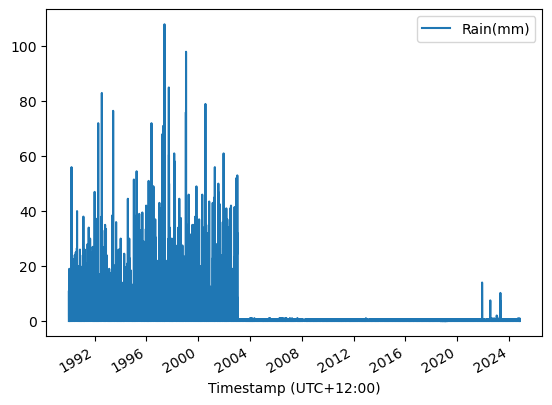

In [7]:
rain.plot()

In [8]:
mean_rain = rain['Rain(mm)'].mean()
std_rain = rain['Rain(mm)'].std()

# Define thresholds for outliers
lower_threshold = mean_rain - 2 * std_rain
upper_threshold = mean_rain + 2 * std_rain

# Find rows with unusual values
troubling_rows = rain[(rain['Rain(mm)'] < lower_threshold) | (rain['Rain(mm)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                       Rain(mm)
Timestamp (UTC+12:00)          
1990-01-05 07:00:00       11.00
1990-01-16 07:00:00       19.00
1990-01-17 07:00:00       18.00
1990-01-30 07:00:00        6.50
1990-02-25 07:00:00        8.50
...                         ...
2023-04-22 12:00:00        4.52
2023-04-30 18:00:00        4.51
2023-05-01 00:00:00        4.17
2023-05-01 06:00:00       10.22
2023-05-01 12:00:00        6.52

[4432 rows x 1 columns]


In [9]:
print("\nAwhitu Soil Moisture Data statistics :")
sm.describe()



Awhitu Soil Moisture Data statistics :


,SoilMoisture(%)
count,278270.000000
mean,44.748779
std,4.281101
min,0.000000
25%,42.481000
50%,45.836000
75%,47.192000
max,53.619000


<Axes: xlabel='Timestamp (UTC+12:00)'>

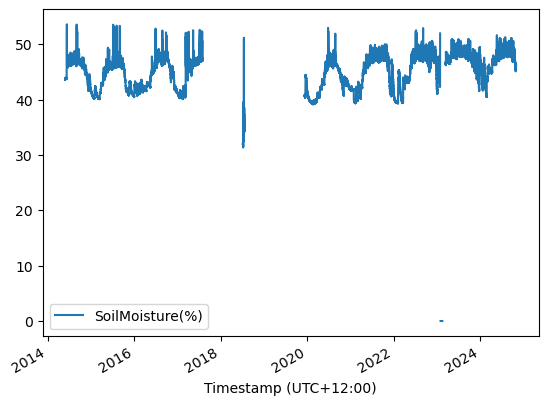

In [10]:
sm.plot()

In [11]:
mean_sm = sm['SoilMoisture(%)'].mean()
std_sm = sm['SoilMoisture(%)'].std()

# Define thresholds for outliers
lower_threshold = mean_sm - 2 * std_sm
upper_threshold = mean_sm + 2 * std_sm

# Find rows with unusual values
troubling_rows = sm[(sm['SoilMoisture(%)'] < lower_threshold) | (sm['SoilMoisture(%)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                       SoilMoisture(%)
Timestamp (UTC+12:00)                 
2014-06-11 02:00:00             53.455
2014-06-11 02:15:00             53.569
2014-06-11 02:30:00             53.501
2014-06-11 02:45:00             53.500
2014-06-11 03:00:00             53.501
...                                ...
2023-05-11 05:07:00              0.000
2023-07-18 07:07:00              0.000
2023-07-19 06:52:00              0.000
2024-01-08 11:07:00              0.000
2024-07-25 11:45:00              0.000

[2461 rows x 1 columns]


In [12]:
print("\nAwhitu Soil Temperature Data statistics :")
st.describe()


Awhitu Soil Temperature Data statistics :


,SoilTemp(c)
count,362509.000000
mean,22.749571
std,45.025696
min,-11.500000
25%,14.000000
50%,17.600000
75%,21.900000
max,479.000000


<Axes: xlabel='Timestamp (UTC+12:00)'>

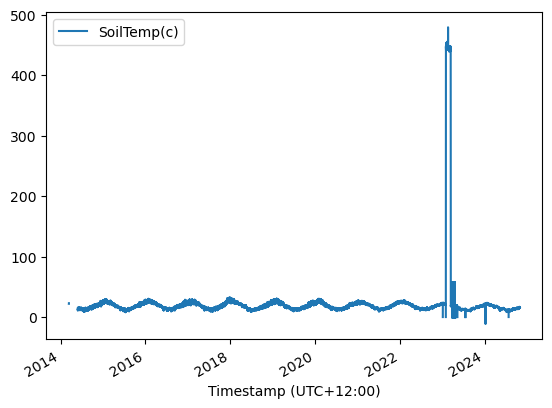

In [13]:
st.plot()

In [14]:
mean_st = st['SoilTemp(c)'].mean()
std_st = st['SoilTemp(c)'].std()

# Define thresholds for outliers
lower_threshold = mean_st - 2 * std_st
upper_threshold = mean_st + 2 * std_st

# Find rows with unusual values
troubling_rows = st[(st['SoilTemp(c)'] < lower_threshold) | (st['SoilTemp(c)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                       SoilTemp(c)
Timestamp (UTC+12:00)             
2023-01-31 12:30:00          440.2
2023-01-31 12:45:00          441.1
2023-01-31 13:00:00          442.0
2023-01-31 13:15:00          442.1
2023-01-31 13:30:00          442.5
...                            ...
2023-03-14 08:45:00          441.6
2023-03-14 09:00:00          442.7
2023-03-14 09:15:00          441.7
2023-03-14 09:30:00          441.1
2023-03-14 09:45:00          411.6

[4022 rows x 1 columns]


In [15]:
# Replace -1 with NaN
sm.replace(-1, np.nan, inplace=True)
print(sm)

                       SoilMoisture(%)
Timestamp (UTC+12:00)                 
2014-05-27 17:45:00             43.589
2014-05-27 18:00:00             43.587
2014-05-27 18:15:00             43.586
2014-05-27 18:30:00             43.561
2014-05-27 18:45:00             43.561
...                                ...
2024-10-29 18:30:00             46.147
2024-10-29 18:45:00             46.057
2024-10-29 19:00:00             46.168
2024-10-29 19:15:00             46.236
2024-10-29 19:30:00             46.236

[279282 rows x 1 columns]


Data Cleaning


In [16]:
# Display missing value
print("Missing Value in Soil Moisture Data")
sm.isna().sum()
print(sm[sm['SoilMoisture(%)'].isnull()])

Missing Value in Soil Moisture Data
                       SoilMoisture(%)
Timestamp (UTC+12:00)                 
2017-08-01 16:00:00                NaN
2018-07-07 11:14:00                NaN
2018-07-10 10:15:00                NaN
2018-07-10 11:14:00                NaN
2018-07-11 04:00:00                NaN
...                                ...
2024-07-25 11:44:00                NaN
2024-07-25 11:45:00                NaN
2024-07-25 13:29:00                NaN
2024-10-03 14:15:00                NaN
2024-10-03 14:44:00                NaN

[1012 rows x 1 columns]


In [17]:
# Display missing value

print("Missing Value in Soil Temperature Data")
st.isna().sum()

print(st[st['SoilTemp(c)'].isnull()])

Missing Value in Soil Temperature Data
                       SoilTemp(c)
Timestamp (UTC+12:00)             
2014-03-12 11:45:00            NaN
2014-05-27 17:29:00            NaN
2014-08-30 06:45:00            NaN
2014-08-30 11:59:00            NaN
2014-10-17 06:00:00            NaN
...                            ...
2024-05-02 15:59:00            NaN
2024-06-15 02:00:00            NaN
2024-06-15 08:44:00            NaN
2024-07-25 10:00:00            NaN
2024-07-25 13:29:00            NaN

[1102 rows x 1 columns]


In [18]:
# Display missing value
print("Missing Value in Rainfall Data")
rain.isna().sum()
print(rain[rain['Rain(mm)'].isnull()])

Missing Value in Rainfall Data
                       Rain(mm)
Timestamp (UTC+12:00)          
2018-10-02 08:30:00         NaN
2018-10-09 13:14:00         NaN
2018-10-18 07:00:00         NaN
2018-10-25 23:59:00         NaN
2018-12-06 15:15:00         NaN
2018-12-14 17:59:00         NaN
2018-12-25 18:45:00         NaN
2019-01-14 05:59:00         NaN
2019-01-28 08:45:00         NaN
2019-02-06 22:59:00         NaN
2019-02-24 16:15:00         NaN
2019-03-07 16:59:00         NaN


# Step 2: Handle Missing Values

In [19]:
# Replace -1 with NaN
sm.replace(0, np.nan, inplace=True)
# sm.isna().sum()
sm.isnull().sum()


SoilMoisture(%)    2434
dtype: int64

<Axes: xlabel='Timestamp (UTC+12:00)'>

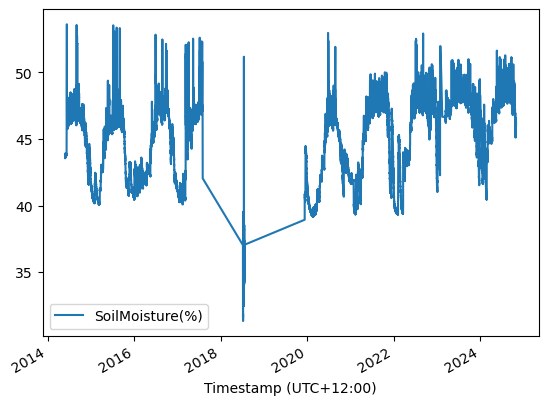

In [20]:
sm.interpolate(method='linear', imit_direction='both', inplace=True)
sm.plot()

In [21]:
mean_sm = sm['SoilMoisture(%)'].mean()
std_sm = sm['SoilMoisture(%)'].std()

# Define thresholds for outliers
lower_threshold = mean_sm - 2 * std_sm
upper_threshold = mean_sm + 2 * std_sm

# Find rows with unusual values
troubling_rows = sm[(sm['SoilMoisture(%)'] < lower_threshold) | (sm['SoilMoisture(%)'] > upper_threshold)]

# Display the troubling rows
print(troubling_rows)

                       SoilMoisture(%)
Timestamp (UTC+12:00)                 
2014-06-11 01:45:00             52.220
2014-06-11 02:00:00             53.455
2014-06-11 02:15:00             53.569
2014-06-11 02:30:00             53.501
2014-06-11 02:45:00             53.500
...                                ...
2024-09-21 06:45:00             50.911
2024-09-21 07:00:00             50.911
2024-09-21 07:15:00             50.817
2024-09-21 07:30:00             50.864
2024-09-21 07:45:00             50.793

[4217 rows x 1 columns]


<Axes: xlabel='Timestamp (UTC+12:00)'>

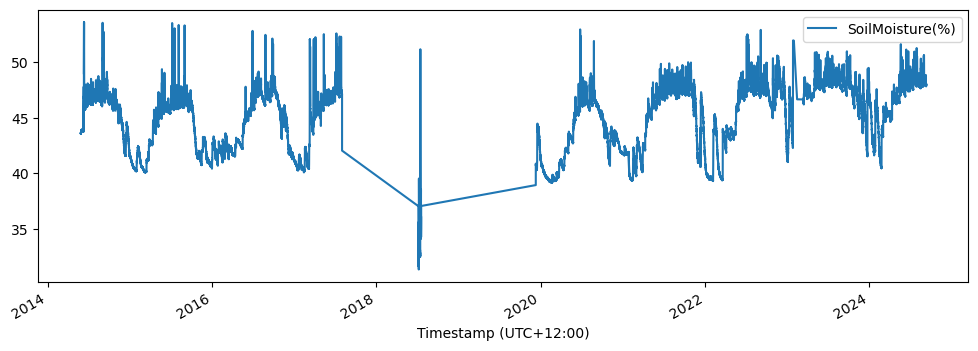

In [22]:
# sm.to_csv('../Data/soil data/Awhitu-741611-20240910095744/AwhituSMc.csv')
sm = pd.read_csv('../Data/soil data/Awhitu-741611-20240910095744/AwhituSMc.csv', index_col='Timestamp (UTC+12:00)', parse_dates=['Timestamp (UTC+12:00)'])
sm.plot(figsize=(12,4))

In [23]:
sm.describe()

,SoilMoisture(%)
count,274583.000000
mean,44.957379
std,2.849027
min,31.342000
25%,42.502000
50%,45.827000
75%,47.174000
max,53.619000


In [24]:
# soil moisture and soil temperature using linear to fill data
st.interpolate(method='linear', inplace=True)

rain.fillna(0, inplace=True)


In [25]:
# double check missing value

# sm.isna().sum()
# st.isna().sum()
# rain.isna().sum()


# Step 3: Resample Data to 15 minutes interval

In [28]:
soil_moisture_15mins = sm.resample('15T').mean()

soil_temp_15mins = st.resample('15T').mean()
rainfall_15mins = rain.resample('15T').sum()


C:\Users\Ying\AppData\Local\Temp\ipykernel_13160\1153708465.py:1: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  soil_moisture_15mins = sm.resample('15T').mean()
C:\Users\Ying\AppData\Local\Temp\ipykernel_13160\1153708465.py:3: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  soil_temp_15mins = st.resample('15T').mean()
C:\Users\Ying\AppData\Local\Temp\ipykernel_13160\1153708465.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  rainfall_15mins = rain.resample('15T').sum()


# Step 4: Combine Data

In [29]:
# Determine the latest common start date
latest_start_date = max(rainfall_15mins.index.min(), soil_moisture_15mins.index.min(), soil_temp_15mins.index.min())
end_date = min(rainfall_15mins.index.max(), soil_moisture_15mins.index.max(), soil_temp_15mins.index.max())




In [30]:
# Filter datasets to the common time range
soil_moisture_15mins = soil_moisture_15mins[latest_start_date:end_date]
soil_temp_15mins = soil_temp_15mins[latest_start_date:end_date]
rainfall_15mins = rainfall_15mins[latest_start_date:end_date]


In [31]:
# Merge datasets on the timestamp
awhitu_data_15mins = rainfall_15mins.join(soil_temp_15mins, how='inner', rsuffix='_rain')
awhitu_data_15mins = awhitu_data_15mins.join(soil_moisture_15mins, how='inner', rsuffix='_soil_moisture')
awhitu_data_15mins.dropna(inplace=True)  # Drop any rows with missing values after merging


In [32]:
awhitu_data_15mins.head()

,Rain(mm),SoilTemp(c),SoilMoisture(%)
Timestamp (UTC+12:00),,,
2014-05-27 17:45:00,0.0,14.2,43.589
2014-05-27 18:00:00,0.0,14.2,43.587
2014-05-27 18:15:00,0.0,14.0,43.586
2014-05-27 18:30:00,0.0,14.0,43.561
2014-05-27 18:45:00,0.0,13.9,43.561


In [33]:
# Save the combined data to a new CSV file
awhitu_data_15mins.to_csv('../Data/soil data/Awhitu-741611-20240910095744/awhituCombined_Data_15mins.csv')
print("Combined data (15-minute intervals) saved successfully.")

Combined data (15-minute intervals) saved successfully.


In [34]:
# awhitu = pd.read_csv('../Data/soil data/Awhitu-741611-20240910095744/awhituCombined_Data_15mins.csv', parse_dates=['Timestamp (UTC+12:00)'])
# awhitu.head()

In [35]:
# awhitu['Location'] = 'South Auckland'
# awhitu['Land position'] = 'Terrace'
# awhitu['Slope(degree)'] = '0-3'
# awhitu['Soil Order'] = 'Granular'
# awhitu['Soil Types / Series'] = 'Matakawau clay loam'
# awhitu['NZ Soil Classification'] = 'Typic Orthic Granular'
# awhitu['Soil Profile Description'] = '0-10cm brown sandy loam, powdery structure; 10-20cm brown sandy clay loam nutty to crumbly structure; 20-30+cm orange-brown sandy clay, crumbly structure'
# awhitu['Pastoral land use'] = 'Regional Park'
# awhitu.head()
# awhitu.to_csv('../Data/soil data/awhitu_soil_data.csv')


Data Transformation


Feature Engineering: Scaling, Normalization and Standardization


Feature Selection


Handling Imbalanced Data


Encoding Categorical Features


Data Splitting